In [22]:
from sklearn.metrics import roc_curve, classification_report
from joblib import dump, load
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from image_loader import ImageLoader, ImagePreprocessing

In [2]:
IMG_SIZE = (100, 100)
TRAIN_DIR = "images/train/train"
TEST_DIR = "images/test/test"
CLASSES = {"cat": 0, "dog": 1}

In [25]:
mlp_model = load("models/mlp_classifier.joblib")

In [16]:
test_hog = []

In [5]:
image_loader = ImageLoader(dir_name=TRAIN_DIR)
image_preprocessor = ImagePreprocessing(img_size=IMG_SIZE)

In [17]:
test_images = image_loader.get_batch(start=20000, stop=24999, labels=CLASSES, new_size=IMG_SIZE, shuffle=True)
test_labels = test_images["target"]
for timg in test_images["data"]:
    thog = image_preprocessor.simple_preproc(timg)
    test_hog.append(thog)

['images/train/train/cat.5893.jpg', 'images/train/train/dog.10345.jpg', 'images/train/train/dog.10809.jpg', 'images/train/train/dog.3219.jpg', 'images/train/train/cat.9641.jpg', 'images/train/train/cat.8893.jpg', 'images/train/train/cat.7507.jpg', 'images/train/train/dog.8943.jpg', 'images/train/train/dog.9576.jpg', 'images/train/train/cat.7539.jpg']


In [26]:
print(classification_report(test_labels, mlp_model.predict(test_hog), target_names=["cat", "dog"]))

              precision    recall  f1-score   support

         cat       0.74      0.78      0.76      2470
         dog       0.77      0.73      0.75      2530

    accuracy                           0.76      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.76      0.76      0.76      5000



In [27]:
fpr, tpr, thresholds = roc_curve(test_labels, mlp_model.predict_proba(test_hog)[:, 1], pos_label=1)

Text(0, 0.5, 'True Positive Rate')

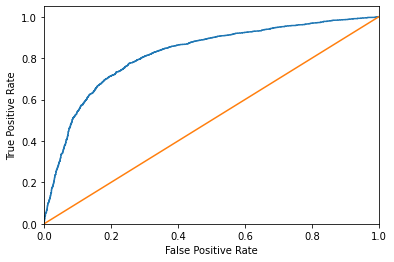

In [28]:
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")